## QUESTION 4

##### Summary 
The shop is opened 200 days a year. Since it is normally distributed;

$$
\begin{align}
\text{Mean} &= 75 ~ pounds\\
\text{S.D} &= 15 ~ pounds\\
\text{Lead time} &= 4~days\\
\text{Fixed cost} &= 16~dollars~per~order\\
\text{Annual Holding Cost} &= 3~dollars~per~pound\\
\text{Demand} &= 75*200\\  &= 15000\\
\end{align}
$$

Q1)\
economic order quantity (EOQ) for coffee beans
$$
\begin{align}
\text{Economic Order Quantity} &= sqrt(\frac{2*D*S}{H})\\
&= sqrt(\frac{2*15000*16}{3})\\
&= 400
\end{align}
$$

Q2)\
total annual holding costs of stock for coffee beans
$$
\begin{align}
\text{Total Annual Holding Cost} &= \frac{Q}{2}*H\\
&= \frac{400}{2}*3\\
&= 600~dollars
\end{align}
$$

Q3)\
total annual ordering costs for coffee beans
$$
\begin{align}
\text{Total Annual Ordering Cost} &= \frac{D}{Q}*S\\
&= \frac{15000}{400}*16\\
&= 600~dollars
\end{align}
$$

Q4)\
What should the reorder point (ROP) be assuming a risk of 1 percent stockout is acceptable
$$
\begin{align}
\text{Stock out risk} &= 1 percent\\
\text{CSL} &= 99 percent\\
\text{Z score} &= 2.33\\
\text{ROP} &= Lead~time~demand + Safety~stock(s.s)\\
&=75(4) + 2.33(15*sqrt(4))\\
&= 369.9
\end{align}
$$

Q5)\
safety stock needed to attain a 1% risk of stockout during the lead time
$$
\begin{align}
\text{SS} &= Z * S.D * sqrt(Lead~time)\\
&= 69.9~dollars
\end{align}
$$

Q6)\
annual holding cost of maintaining the level of safety stock needed
$$
\begin{align}\\
\text{SS} &= 69.9 * 3\\
&= 209.7~dollars
\end{align}
$$

Q7)\
If 2% risk of stockout during lead time is acceptable, the safety stock holding cost would decrease.
$$
\begin{align}
\text{CSL} &= 98~percent\\
\text{Z score} &= 2.06~(using~the~z~table)\\
&= 61.8~dollars
\end{align}
$$

## QUESTION 3 

##### Summary 
Magazines are printed 1 week prior to the start of the sales;

$$
\begin{align}
\text{Total fans} &= 90,000\\
\text{no of fans that bought the issue} &= 2/3 ~of ~90,000 \\
&= 60,000\\
\text{recycling cost} &= 15 ~cent~per~program\\
\text{cost to print} &= 1.5~dollars~per~each~program\\
\text{S.D} &= 4500~programs\\
\end{align}
$$

Q1)\
the cost of underestimating demand for each program
$$
\begin{align}\\
\text{Cu} &= sale~price~per~unit - cost~per~unit\\
&= 4~ dollars - 1.5~ dollars\\
&= 2.5~dollars
\end{align}
$$

Q2)\
the cost of overestimating demand for each program
$$
\begin{align}\\
\text{Co} &= cost~per~unit - salvage~value\\
&= 1.5~ dollars - 0.15~dollars\\
&= 1.35~dollars
\end{align}
$$

Q3)\
The number of programs that should be ordered per game
$$
\begin{align}
\text{CSL} &= \frac{2.5}{2.5+1.35}\\
&= 0.6494\\
&= 64.94 ~percent
\end{align}
$$

We find the z score = 0.3837
$$
\begin{align}
\text{Optimal stocking level} &= Mean + Z~score*S.D\\
\text{Optimal stocking level} &= 60,000 + (0.3837*4500)\\
&= 61,726.66\\
&= 61,727
\end{align}
$$

Q4)\
stockout risk for this order size
$$
\begin{align}
\text{stock out risk} &= 1 - CSL\\
\text{stock out risk} &= 1 - 0.6494\\
&= 0.3506\\
&= 35.06~percent
\end{align}
$$

## QUESTION 2

#### Uncapacitated facility location problem

In [190]:
import gurobipy as gp
from gurobipy import  Model, GRB, quicksum
import numpy as np
import time
import math
import matplotlib.pyplot as plt

##### setting parameters

In [191]:
rnd = np.random
rnd.seed(89)      #we want to get the same random values

In [192]:
m = 120 # number of demand points (customers)
n = 10 # number of facilities

In [193]:
Demand = [i for i in range(1, m + 1)]
Facility = [j for j in range(1, n + 1)] #generating randomly

In [194]:
fixed_cost = {j : rnd.randint(100, 500) for j in Facility} #generating fixed cost

##### setting the grid

In [195]:
x_F = [ rnd.randint(0, 200) for j in Facility ]
y_F = [ rnd.randint(0, 200) for j in Facility ]

In [196]:
x_D = [ rnd.randint(0, 200) for i in Demand ]
y_D = [ rnd.randint(0, 200) for i in Demand ]

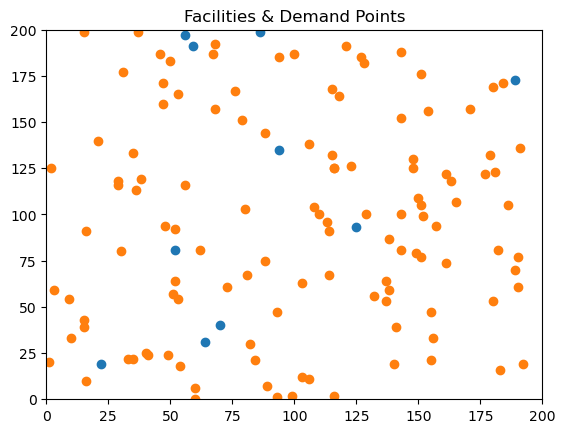

In [197]:
plt.xlim(0,200)
plt.ylim(0,200)
plt.scatter(x_F, y_F)
plt.scatter(x_D, y_D)
plt.title('Facilities & Demand Points')
plt.show()

##### using rectilinear method to calculate distance between nodes

In [198]:
def Calculate_distance(x_F , y_F , x_D ,y_D):
    return ( abs(x_F - x_D) + abs(y_F - y_D))

#### creating a combination with i , j to include distance

In [199]:
c = { (i,j) : Calculate_distance( x_F[j-1] , y_F[j-1] , x_D[i-1] , y_D[i-1] ) for j in Facility for i in Demand }

#### Declaring the model

In [200]:
model = gp.Model('CFLP')

#### Decision variables

In [201]:
x = model.addVars(Demand, Facility, vtype= GRB.BINARY, name = 'x')

In [202]:
y = model.addVars(Facility , vtype = GRB.BINARY, name = 'y' )

#### Constraint

In [203]:
Demand_c = model.addConstrs(gp.quicksum( x[i,j] for j in Facility ) == 1 for i in Demand)

In [204]:
Facility_c = model.addConstrs( x[i,j] <= y[j] for i in Demand for j in Facility )

#### Objective function

In [205]:
model.setObjective( gp.quicksum( c[i,j] * x[i,j] for i in Demand for j in Facility ) 
               + gp.quicksum( fixed_cost[j] * y[j] for j in Facility ) , GRB.MINIMIZE )

#### update and write model

In [206]:
model.update()
model.write('0UFLP.lp')

#### solving the model

In [207]:
start = time.time()
model.optimize()
end = time.time()

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[x86])

CPU model: Intel(R) Core(TM) i3-1000NG4 CPU @ 1.10GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 1320 rows, 1210 columns and 3600 nonzeros
Model fingerprint: 0xd6019d17
Variable types: 0 continuous, 1210 integer (1210 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e+00, 5e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 20917.000000
Presolve removed 22 rows and 20 columns
Presolve time: 0.02s
Presolved: 1298 rows, 1190 columns, 3540 nonzeros
Found heuristic solution: objective 12422.000000
Variable types: 0 continuous, 1190 integer (1190 binary)
Found heuristic solution: objective 7814.0000000

Root relaxation: objective 7.558000e+03, 235 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  O

In [208]:
def print_solution(model):
    if model.status != GRB.OPTIMAL:
        print("Model is not Optimized")
    
    else:
        print('Objective function value: ', model.objVal)
        print('Solution time: ', end - start, ' seconds')
        print('=================================================')
        vars = model.getVars()
        values = model.getAttr('x', vars)
        for var, val in zip(vars, values):
            if val > 1e-6:
                print(f"{var.varName}: {val}") 

In [209]:
print_solution(model)

Objective function value:  7558.0
Solution time:  0.1412348747253418  seconds
x[1,7]: 1.0
x[2,1]: 1.0
x[3,6]: 1.0
x[4,4]: 1.0
x[5,4]: 1.0
x[6,7]: 1.0
x[7,3]: 1.0
x[8,7]: 1.0
x[9,3]: 1.0
x[10,4]: 1.0
x[11,4]: 1.0
x[12,1]: 1.0
x[13,1]: 1.0
x[14,4]: 1.0
x[15,6]: 1.0
x[16,7]: 1.0
x[17,4]: 1.0
x[18,2]: 1.0
x[19,3]: 1.0
x[20,2]: 1.0
x[21,1]: 1.0
x[22,6]: 1.0
x[23,4]: 1.0
x[24,4]: 1.0
x[25,6]: 1.0
x[26,7]: 1.0
x[27,7]: 1.0
x[28,4]: 1.0
x[29,6]: 1.0
x[30,7]: 1.0
x[31,7]: 1.0
x[32,1]: 1.0
x[33,7]: 1.0
x[34,7]: 1.0
x[35,4]: 1.0
x[36,1]: 1.0
x[37,6]: 1.0
x[38,6]: 1.0
x[39,4]: 1.0
x[40,7]: 1.0
x[41,4]: 1.0
x[42,7]: 1.0
x[43,7]: 1.0
x[44,7]: 1.0
x[45,6]: 1.0
x[46,4]: 1.0
x[47,7]: 1.0
x[48,7]: 1.0
x[49,1]: 1.0
x[50,6]: 1.0
x[51,7]: 1.0
x[52,2]: 1.0
x[53,3]: 1.0
x[54,3]: 1.0
x[55,2]: 1.0
x[56,7]: 1.0
x[57,7]: 1.0
x[58,2]: 1.0
x[59,4]: 1.0
x[60,3]: 1.0
x[61,4]: 1.0
x[62,6]: 1.0
x[63,6]: 1.0
x[64,2]: 1.0
x[65,7]: 1.0
x[66,4]: 1.0
x[67,4]: 1.0
x[68,4]: 1.0
x[69,7]: 1.0
x[70,4]: 1.0
x[71,6]: 1.0
x[72,4]:

#### plotting the distributions

No. of Demands that are served by Facility 1 :  16
No. of Demands that are served by Facility 2 :  13
No. of Demands that are served by Facility 3 :  12
No. of Demands that are served by Facility 4 :  27
No. of Demands that are served by Facility 6 :  18
No. of Demands that are served by Facility 7 :  34


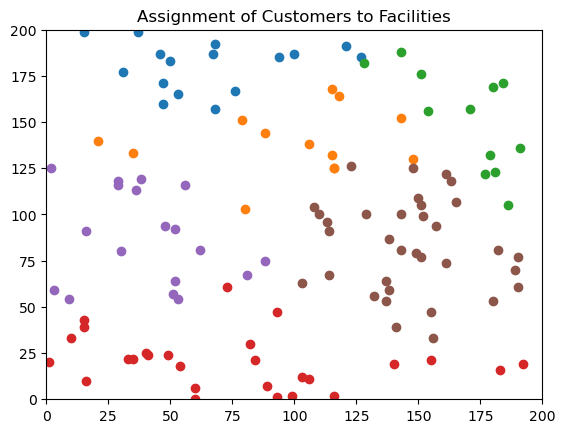

In [210]:
plt.xlim(0,200)
plt.ylim(0,200)
plt.title('Assignment of Customers to Facilities')

selected_facilities = [ j for j in Facility if y[j].x > 0 ]

for k in range(len(selected_facilities)):
    j = selected_facilities[k]
    served_by_k = [ i for i in Demand if x[i,j].x > 0.5 ]
    x_S = [ x_D[j-1] for j in served_by_k ]
    y_S = [ y_D[j-1] for j in served_by_k ]
    plt.scatter(x_S, y_S)
    print("No. of Demands that are served by Facility",j,": ",len(served_by_k))


## QUESTION 1

In [211]:
import networkx as nx
import random

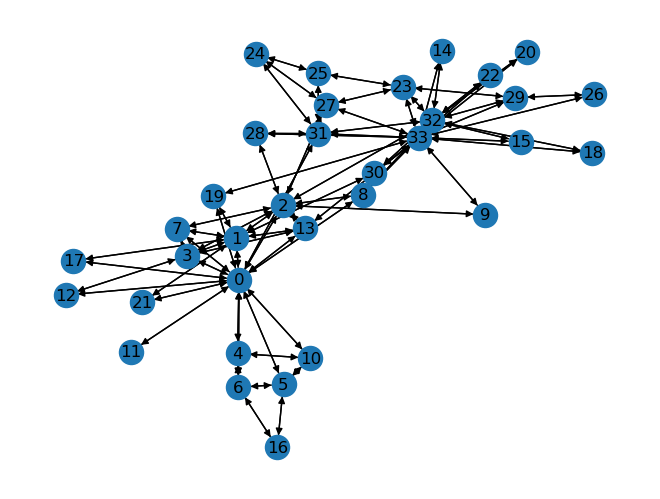

In [212]:
DG = nx.DiGraph(nx.karate_club_graph())
nx.draw(DG, with_labels = True)

#### setting parameters

In [213]:
DG.add_nodes_from(range(34))

In [214]:
supply_nodes = range(17)
demand_nodes = range(17, 34)

In [215]:
for i in supply_nodes:
    DG.nodes[i]["Value"] = np.random.randint(1,100)
    DG.nodes[i]["Type"] = "Supply"

for i in demand_nodes:
    DG.nodes[i]["Value"] = -1 * DG.nodes[33-i]["Value"]
    DG.nodes[i]["Type"] = "Demand"

In [216]:
supply_sum = 0
demand_sum = 0

for i in range(34):
    node = DG.nodes[i]
    if node["Type"] == "Demand":
        demand_sum += node["Value"]
    else:
        supply_sum += node["Value"]

print("Supply Sum:", supply_sum)
print("Demand Sum:", demand_sum)


Supply Sum: 885
Demand Sum: -885


#### setting the capacity and cost parameter

In [217]:
for i in range(34):
    for j in range(34):
        nx.set_edge_attributes(DG, {(i, j): {"Capacity": np.random.randint(100,1000)}})

In [218]:
for i in range(34):
    for j in range(34):
        nx.set_edge_attributes(DG, {(i, j): {"Cost":np.random.randint(1,100)}})

#### model deployment

In [219]:
model = gp.Model('Minimum Cost Flow')

#### decision variables

In [220]:
x = model.addVars( DG.edges, vtype = GRB.CONTINUOUS, name = 'arcs'  )

#### setting constraint

In [221]:
for i in DG.nodes:
    model.addConstr(gp.quicksum( x[i,j] for j in DG.successors(i)) - gp.quicksum( x[j,i] for j in DG.predecessors(i) ) == DG.nodes[i]["Value"])  

In [222]:
for edge in nx.edges(DG, nbunch=None):
    Capacity = nx.get_edge_attributes(DG, "Capacity")
    model.addConstr(x[edge[0],edge[1]] <= Capacity[(edge[0],edge[1])])

In [223]:
for edge in nx.edges(DG, nbunch=None):
    Capacity = nx.get_edge_attributes(DG, "Capacity")
    model.addConstr(x[edge[0],edge[1]] >= 0)

#### objective function

In [224]:
model.setObjective( gp.quicksum( DG.edges[edge]['Cost'] * x[edge] for edge in DG.edges ), GRB.MINIMIZE )

#### update & writing the model

In [225]:
model.update()
model.write('MinCostFlow.lp')

In [226]:
start = time.time()
model.optimize()
end = time.time()

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[x86])

CPU model: Intel(R) Core(TM) i3-1000NG4 CPU @ 1.10GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 346 rows, 156 columns and 624 nonzeros
Model fingerprint: 0x235fc48b
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e+00, 1e+03]
Presolve removed 314 rows and 2 columns
Presolve time: 0.05s
Presolved: 32 rows, 154 columns, 278 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2740000e+03   2.088750e+02   0.000000e+00      0s
      47    8.2757000e+04   0.000000e+00   0.000000e+00      0s

Solved in 47 iterations and 0.08 seconds (0.00 work units)
Optimal objective  8.275700000e+04


In [227]:
def print_solution(model):
    if model.status != GRB.OPTIMAL:
        print("Model is not Optimized")
    
    else:
        print('Objective function value: ', model.objVal)
        print('Solution time: ', end - start, ' seconds')
        print('=================================================')
        vars = model.getVars()
        values = model.getAttr('x', vars)
        for var, val in zip(vars, values):
            if val > 1e-6:
                print(f"{var.varName}: {val}") 

In [228]:
print_solution(model)

Objective function value:  82757.0
Solution time:  0.10371708869934082  seconds
arcs[0,1]: 216.0
arcs[0,31]: 335.0
arcs[1,2]: 74.0
arcs[1,17]: 73.0
arcs[1,19]: 50.0
arcs[1,21]: 63.0
arcs[1,30]: 13.0
arcs[2,28]: 98.0
arcs[3,13]: 88.0
arcs[4,0]: 70.0
arcs[5,0]: 319.0
arcs[6,5]: 59.0
arcs[7,3]: 68.0
arcs[8,30]: 7.0
arcs[9,33]: 17.0
arcs[10,5]: 89.0
arcs[11,0]: 49.0
arcs[12,0]: 63.0
arcs[13,33]: 95.0
arcs[14,32]: 50.0
arcs[15,32]: 14.0
arcs[15,33]: 70.0
arcs[16,5]: 73.0
arcs[24,27]: 59.0
arcs[25,23]: 89.0
arcs[25,24]: 76.0
arcs[29,26]: 68.0
arcs[31,25]: 172.0
arcs[31,33]: 139.0
arcs[32,20]: 7.0
arcs[33,18]: 84.0
arcs[33,29]: 138.0
arcs[33,22]: 49.0
